# Лабораторная работа №2
## Изучение метода линейной регрессии
### Гончаров Ян

#### Задание:
Используя Scikit-Learn
from sklearn import datasets

Загрузить набор данных diabetes. Исследовать данные, выбрать подходящий столбец
для линейной регресии.

Реализовать метод линейной регрессии используя Scikit-Learn  и собственный алгоритм, вывести значения коэффициентов и отрисовать данные и регрессионную прямую.

Вывести таблицу с результатами предсказаний.

#### Дополнительное задание:
Для рассмотренных моделей (файл LabML_1.2.ipnb и ваше решение задания по второй части) вывести 3 метрики и сделать вывод о качестве модели.

Для использования стандартных метрик в Scikit-Learn имеется модуль metrics
Задача – вывести MAE, R2, MAPE

### Загрузим наши данные и посмотрим на отношение каждого из признаков к таргету

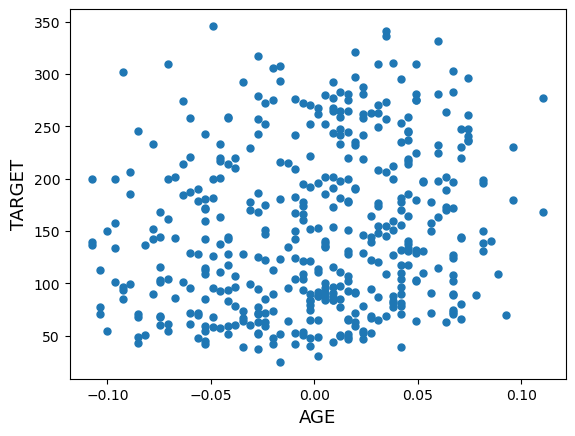

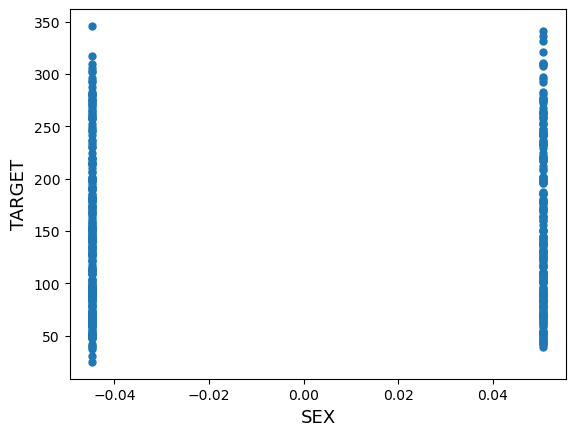

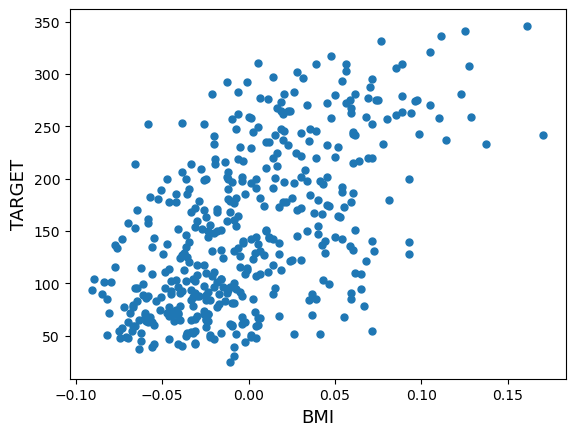

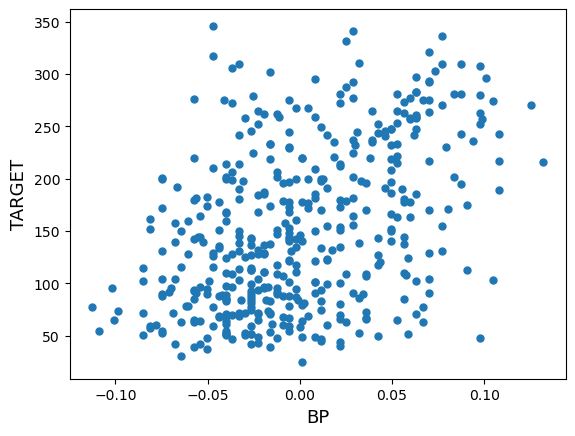

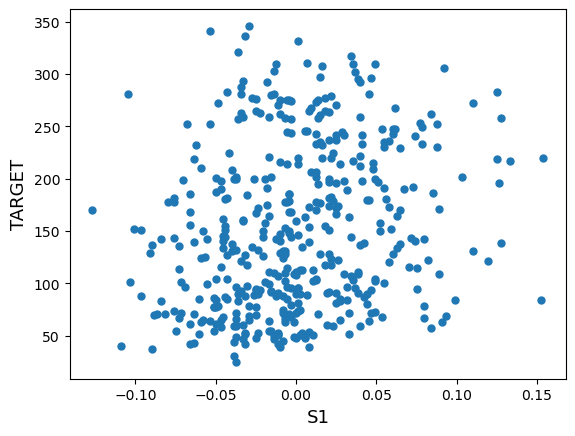

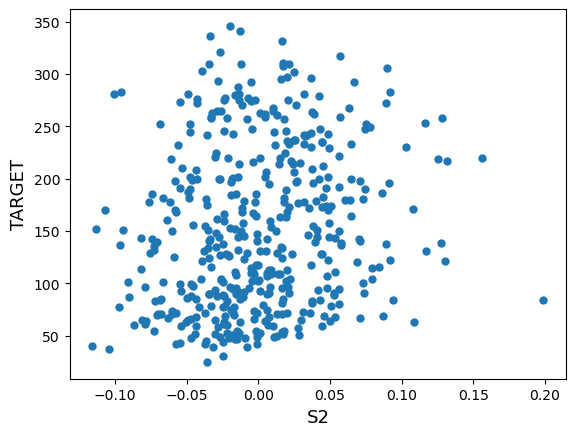

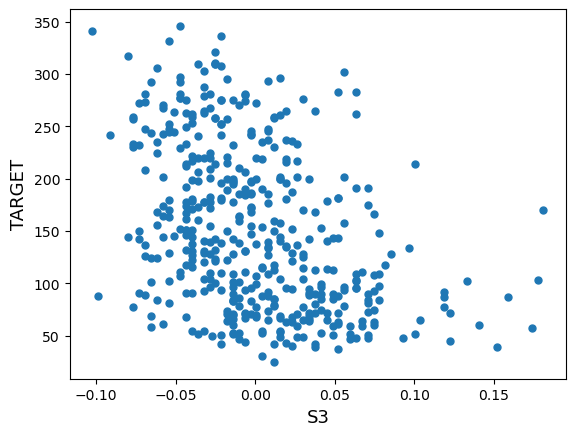

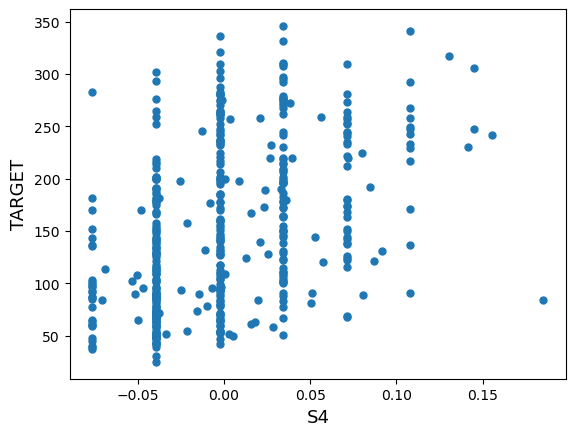

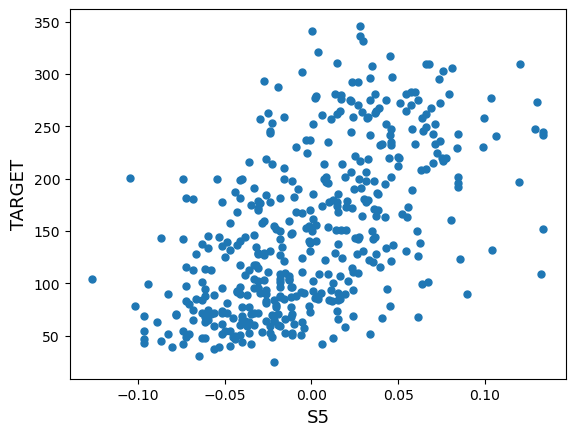

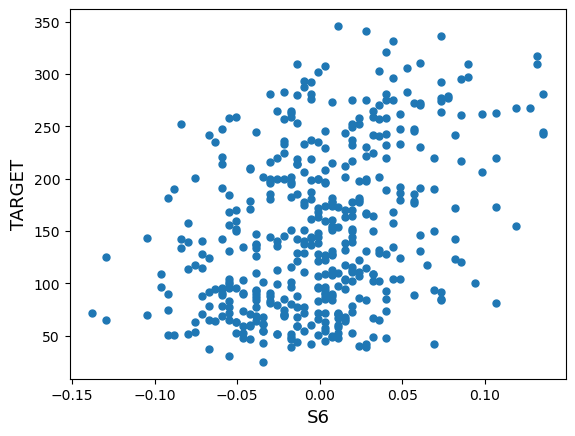

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

diabetes = datasets.load_diabetes(as_frame=True)

features = diabetes['feature_names']
target = diabetes['target']
diabetes_data = diabetes['data']

for feature in features:
    plt.scatter(diabetes_data[feature], target, s=25)
    plt.xlabel(feature.upper(), fontsize = 13)
    plt.ylabel('target'.upper(), fontsize = 13)
    plt.show()

Наиболее подходящие столбцы это S5 и BMI из-за их, похожих на линейные, графиков зависимости от столбца target

### Реализуем метод линейной регрессии используя Scikit-Learn

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = target.to_numpy().reshape(-1, 1)
x = diabetes_data['bmi'].to_numpy().reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("A: ", regressor.intercept_)
print("B: ", regressor.coef_)

A:  [152.28824927]
B:  [[981.65543614]]


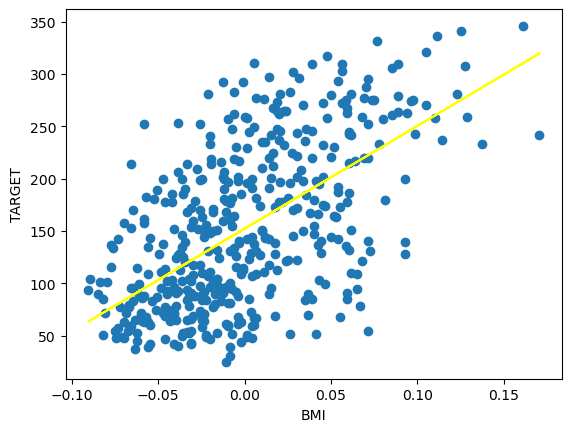

In [32]:
plt.scatter(x, y);
plt.ylabel("TARGET")
plt.xlabel("BMI")

a = regressor.intercept_
b = regressor.coef_

y1 = lambda x: a + x*b;

plt.plot(x, y1(x), "yellow")
plt.show()

### Собственный метод

A:  152.28824927379569
B:  981.6554361411933


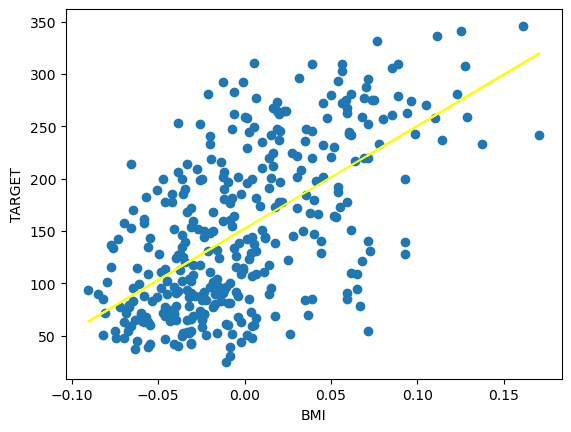

In [33]:
x = x_train
y = y_train

count = x.size

b = ( (count * (x*y).sum()) - (x.sum()) * (y.sum()) ) / ( count * ((x**2).sum()) - ((x.sum())**2) )

a = ( y.sum() - b * (x.sum()))/count

y1 = lambda x: a + x*b;

print("A: ", a)
print("B: ", b)

plt.scatter(x, y);
plt.ylabel("TARGET")
plt.xlabel("BMI")

plt.plot(x, y1(x), "yellow")
plt.show()

### Таблица предсказанных значений

In [34]:
y_pred = regressor.predict(x_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,321.0,255.174269
1,215.0,211.794626
2,127.0,161.008702
3,64.0,129.267499
4,175.0,196.982065
...,...,...
84,104.0,64.727054
85,49.0,82.713736
86,103.0,194.865984
87,142.0,166.298902


### Выведем MAE, R2, MAPE

In [35]:
import sklearn.metrics as metrics

print("MAE: ",metrics.median_absolute_error(y_test, y_pred))
print("R2: ",metrics.r2_score(y_test, y_pred))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_pred))

MAE:  41.47302245213913
R2:  0.19057346847560142
MAPE:  0.4516904624956549


Меньшее значение MAE и MAPE подразумевает более высокую точность регрессионной модели.
И наоборот близкое к единице R2 означает тоже самое

В нашем случае MAE = 41% и MAPE = 45%, что говорит о недостоверности полученных предсказаний
R2 = 20%, что ещё больше усугубляет перспективы использования нашей модели

Модель некомпетентна